## Wine Quality Prediction Pipeline

### This notebook presents a comprehensive pipeline aimed at predicting wine quality through a sequence of steps including data cleaning, analysis, feature engineering, model training, and evaluation. It encapsulates the end-to-end process of developing a machine learning model, focusing on deriving insights from data and leveraging those insights to forecast wine quality with precision.

### First things first, Imports.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import pandas as pd
import os
import sys

## Data Loading 
### We load the data into a data frame. DataFrames simplify data manipulation and analysis.

In [2]:
current_dir = os.getcwd()
data_dir = os.path.join(current_dir, '..', 'data')
data_file = os.path.join(data_dir, 'winequality-white.csv')
data_df = pd.read_csv(data_file, sep=';')

## Data Cleaning
### We clean the data using the `datacleaning` module. This represents the first data pre-processing step and involves a first data analysis to check if there are inconsistencies with the data, e.g. correcting value anomalies like 999 instead of 0.999

In [3]:
sys.path.insert(0, '../src')
import datacleaning
data = datacleaning.clean_data(data_df)
data_xgb = data

## Next, we perform an Exploratory Data Analysis
### For this, we plot the correlations between all features, as well the target, in a heatmap to have a better understanding of the data.
### A more thorough Data Analysis can be found in the `dataanalysis.ipynb` Notebook.

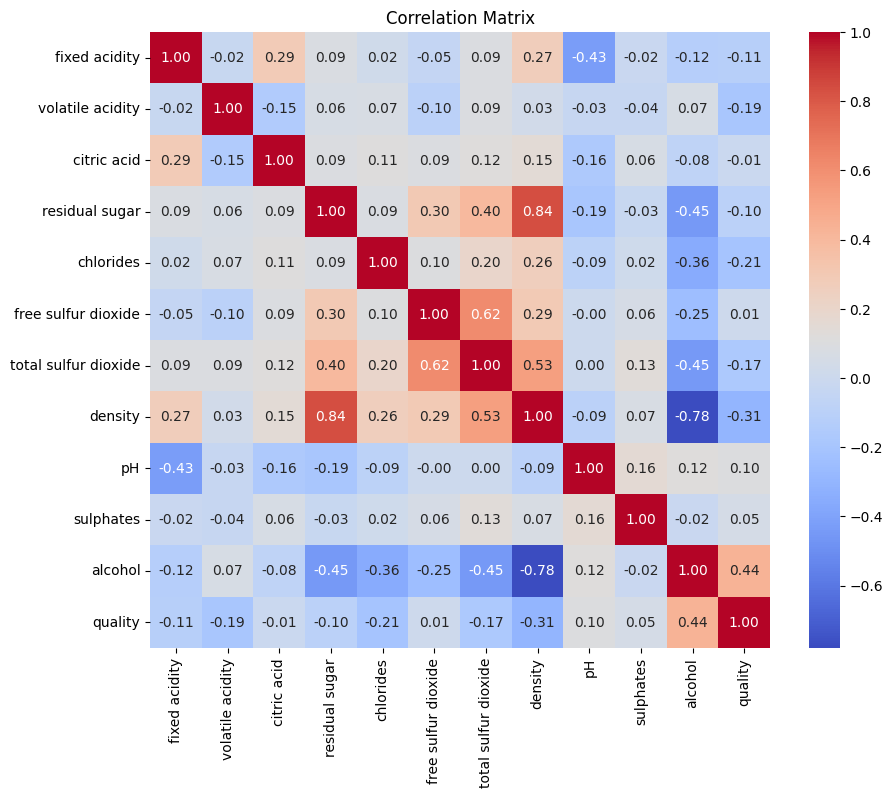

In [4]:
sys.path.insert(0, '../src')
import eda
eda.plot_correlation_matrix(data)

## Feature Engineering
### The following cell computes and visualizes the importance of each feature in predicting the target variable using a Random Forest classifier.

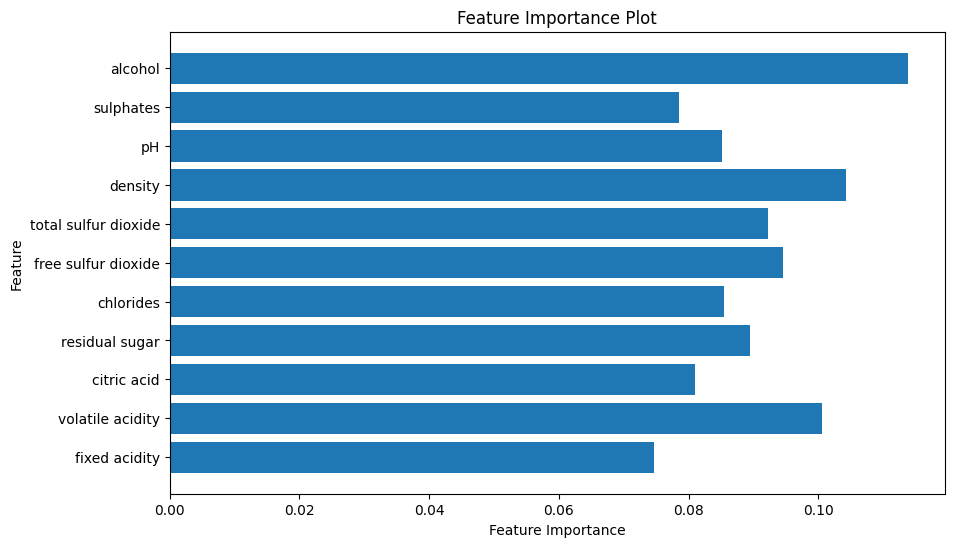

Features sorted by their importance score [('alcohol', 0.11378818862985733), ('density', 0.10432270799770132), ('volatile acidity', 0.10058148616762934), ('free sulfur dioxide', 0.09457861356155367), ('total sulfur dioxide', 0.09225975058522237), ('residual sugar', 0.08939793289709383), ('chlorides', 0.08553461725059043), ('pH', 0.08516651982521965), ('citric acid', 0.08106192152365532), ('sulphates', 0.07856699029233752), ('fixed acidity', 0.07474127126913926)]


In [5]:
sys.path.insert(0, '../src')
import featureengineering
target = 'quality'
importances = featureengineering.process(data, target)
sorted_importances = sorted(importances, key=lambda x: x[1], reverse=True)
print(f"Features sorted by their importance score {sorted_importances}")

### The `featureenginnering.py` module also contains a method to exclude outliers. However, due to the unknown nature of the data collection process, outliers won't be excluded in the next steps. 
### Excluding outliers is especially meaningful if occurent sampling errors are known to happen.

## Feature Selection 
### After examination of the scores, the feature importance scores are closely clustered, and there won't any features dropped.
### All features will be considered in the next steps
### The `featureselection.py` module can be used, if necessary.

## Model Selection
### We choose the `RandomForest` model for predicting wine quality because it's exceptionally adept at handling complex datasets with multiple features. Its ability to model non-linear relationships and handling outliers makes it a robust choice.

## Model Training and Model Evaluation 
### In this cell, we use the `train_wine_quality_model` function to train a RandomForest model on our cleaned wine quality dataset. The function splits the data into training, validation, and test sets, trains the model, and evaluates its performance, providing insights into the model's accuracy on unseen data.

In [6]:
sys.path.insert(0, '../models')
import rfmodel
model = rfmodel.train_wine_quality_model(data)
print(f"Validation accuracy: {model[1]}")
print(f"Test accuracy: {model[2]}")

Validation accuracy: 0.6783284742468416
Test accuracy: 0.7052154195011338


## Model Optimization
### We can try excluding outliers and see if we get better score results
### In the following cell, we try out every combination of feature and see if we get better scores by excluding the outliers of the feature in the combination.
### We see that we do get slightly better results with some combinations
### (Note: running the following cell takes time)

In [7]:
# sys.path.insert(0, '../src')
# import helper

# feature_combinations = helper.generate_feature_combinations(data)

# data_temp = data
# scores = []

# for combo in feature_combinations:
#     if(len(combo) > 3):
#         data_temp = featureengineering.exclude_outliers(data, combo)
#         score = rfmodel.train_wine_quality_model(data_temp)
#         scores.append((score[1], score[2], combo))

# print(f"Max achievable validation accuracy after exluding outliers: {max(scores, key=lambda x: x[0])}")
# print(f"Max achievable test accuracy after exluding outliers: {max(scores, key=lambda x: x[1])}")

### Let's set our new data to get a better test accuracy, exluding outliers for the features ['citric acid', 'residual sugar', 'pH', 'sulphates', 'alcohol'].

In [8]:
data_new = featureengineering.exclude_outliers(data, ['citric acid', 'residual sugar', 'pH', 'sulphates', 'alcohol'])
new_model = rfmodel.train_wine_quality_model(data_new)
print(f"Validation accuracy: {new_model[1]}")
print(f"Test accuracy: {new_model[2]}")

Validation accuracy: 0.6783284742468416
Test accuracy: 0.6938775510204082


### We can enhance our model by fine-tuning the hyperparameters and using cross-validation for better evaluation.
### As we can see in the results, the scores are not better.

In [9]:
result = rfmodel.train_wine_quality_model_enhanced(data)
print(f"Validation Accuracy after Hyperparameter finetuning: {result[1]}")
print(f"test Accuracy after Hyperparamater finetuning: {result[2]}")

Validation Accuracy after Hyperparameter finetuning: 0.644977548892341
test Accuracy after Hyperparamater finetuning: 0.6755102040816326


### We can try feature selection, by selecting features with the highest importance score, and/or the most relevant correlation scores, and try our model again. 
### This helper functions uses the `importances` calculated earlier and the `featureselection` module to evaluate if feature selection delivers better results. The function will incrementally add a feature, based on its importance score

In [10]:
sys.path.insert(0, '../src')
import helper

In [11]:

best_performance = helper.incremental_feature_training(data, importances)
print("Best Performance:", best_performance)

### The results of the previous cell, show that selecting all features in the training process delivers the best validation and test scores.

## Testing the XGB Model

In [ ]:
import gbmmodel
model = gbmmodel.xgbmodel(data_df)